<a href="https://colab.research.google.com/github/rubuntu/Taller_Introduccion_a_Ciencia_de_Datos_IA_e_Ingenieria_de_Datos/blob/main/sesion_03_resp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 3: Visualización de Datos con Matplotlib y Seaborn

## Objetivos
- Aprender a crear gráficos básicos con Matplotlib.
- Usar Seaborn para gráficos estadísticos.
- Explorar patrones en el dataset de churn.

---

## 1. Matplotlib: Gráficos Básicos

Matplotlib is building the font cache; this may take a moment.


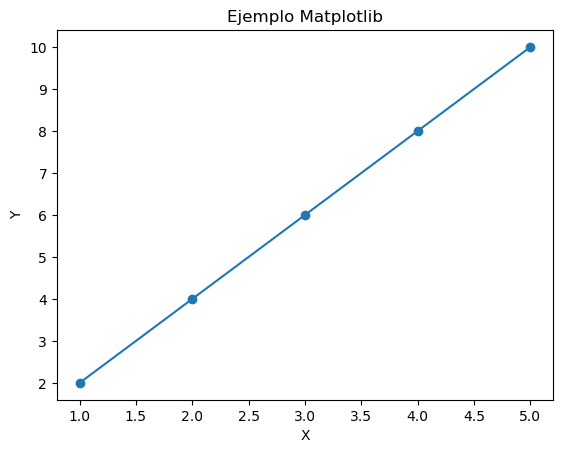

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, marker="o")
plt.title("Ejemplo Matplotlib")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

---

## 2. Seaborn: Gráficos Estadísticos

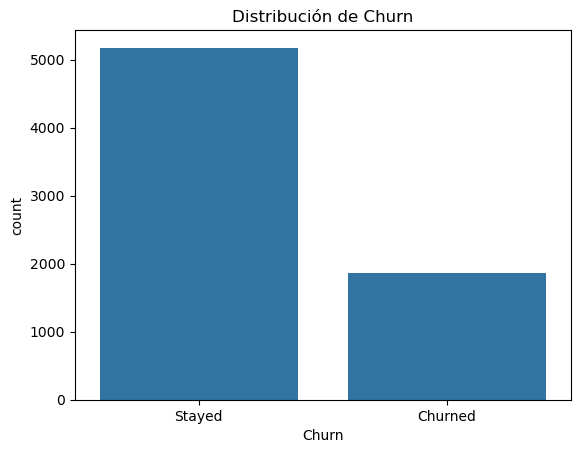

In [ ]:
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/nikhilsthorat03/Telco-Customer-Churn/refs/heads/main/telco.csv"
df = pd.read_csv(url, index_col=0)

# Countplot (categoría vs frecuencia)
sns.countplot(x="Churn", data=df)
plt.title("Distribución de Churn")
plt.show()

---

## 3. Boxplot y Correlaciones

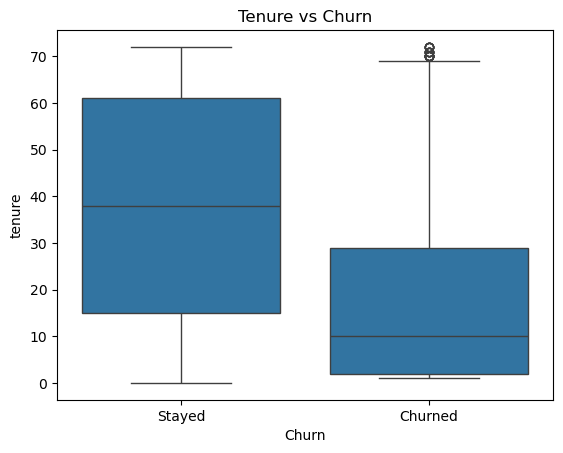

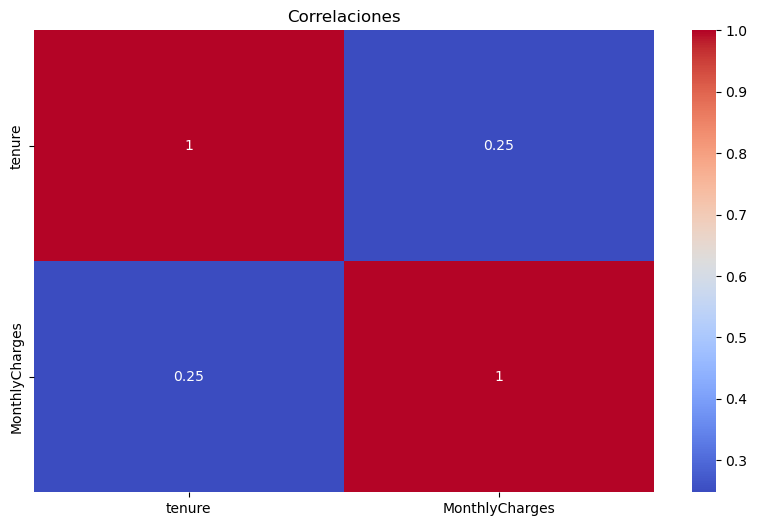

In [ ]:
# Tenure (permanencia) según churn
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlaciones")
plt.show()

---

## 4. Ejercicio Guiado

1. Graficar distribución de `MonthlyCharges`.
2. Comparar `Contract` vs `Churn` con un gráfico de barras.
3. Crear un heatmap solo con variables numéricas.

---

## 5. Preguntas de Discusión

1. ¿Qué patrones aparecen en clientes que abandonan?
2. ¿Qué variables parecen más influyentes visualmente?
3. ¿Cómo usarían estas visualizaciones para convencer a un directivo?

---

# 📊 4. Ejercicio Guiado

### 1. Graficar distribución de `MonthlyCharges`

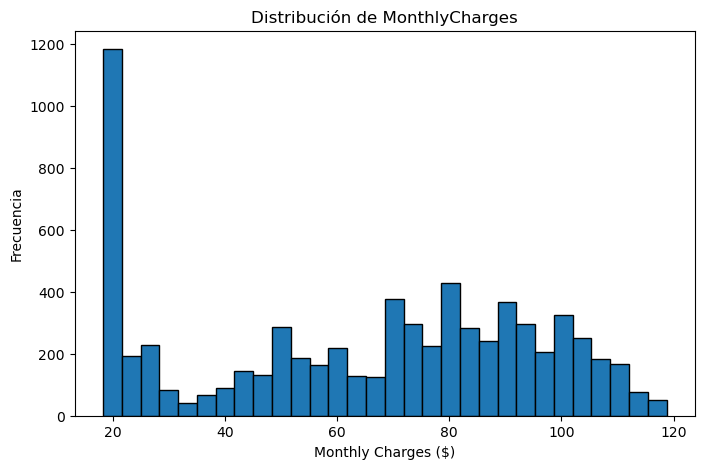

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset (ejemplo Kaggle: Telco Customer Churn)
url = "https://raw.githubusercontent.com/nikhilsthorat03/Telco-Customer-Churn/refs/heads/main/telco.csv"
df = pd.read_csv(url, index_col=0)

plt.figure(figsize=(8,5))
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black')
plt.title("Distribución de MonthlyCharges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frecuencia")
plt.show()

### 2. Comparar `Contract` vs `Churn` con un gráfico de barras


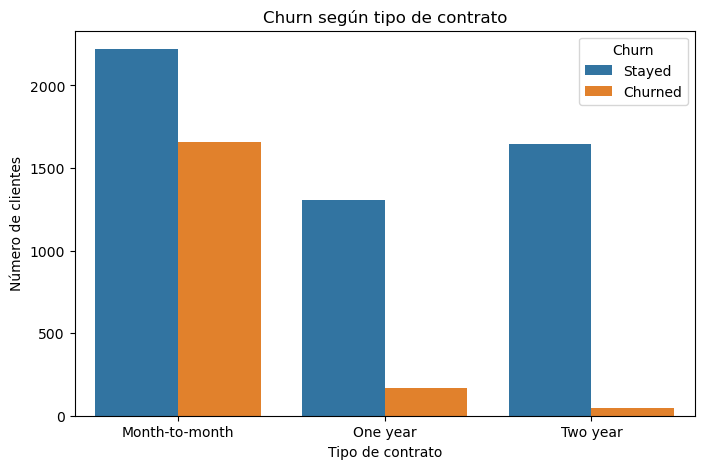

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn según tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.show()

---

### 3. Crear un heatmap solo con variables numéricas

#### Heatmap de densidad 2D (conteo en una malla tenure × MonthlyCharges)

Esto es un “2D histogram” que muestra dónde se concentran los clientes.

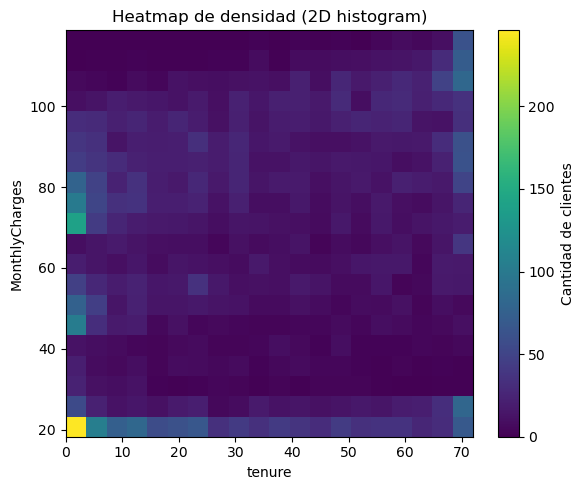

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = pd.to_numeric(df['tenure'], errors='coerce')
y = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
mask = x.notna() & y.notna()
x = x[mask].values
y = y[mask].values

# Ajusta la granularidad con bins
bins_x = 20  # tenure
bins_y = 20  # MonthlyCharges

H, xedges, yedges = np.histogram2d(x, y, bins=[bins_x, bins_y])

plt.figure(figsize=(6, 5))
# Nota: transpose para que el eje Y “suba” en la figura
plt.imshow(H.T, origin='lower', aspect='auto',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Cantidad de clientes')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.title('Heatmap de densidad (2D histogram)')
plt.tight_layout()
plt.show()


---

# 💡 5. Preguntas de Discusión

### 1. ¿Qué patrones aparecen en clientes que abandonan?

* Clientes con **contratos mensuales** tienden a abandonar más que los de **contratos a 1 o 2 años**.
* **MonthlyCharges altos** también suelen estar más asociados a churn.
* Usuarios con **servicios adicionales limitados** (solo internet, sin complementos) tienden a irse más.

---

### 2. ¿Qué variables parecen más influyentes visualmente?

* **Contract**: la duración protege contra el churn.
* **MonthlyCharges**: pagos más altos → mayor probabilidad de salida.
* **Tenure** (tiempo como cliente, si está en el dataset): clientes recientes se van más fácilmente.

---

### 3. ¿Cómo usarían estas visualizaciones para convencer a un directivo?

* **Histograma de MonthlyCharges**: muestra que clientes con cargos altos están más en riesgo → justifica estrategias de retención con descuentos.
* **Barras Contract vs Churn**: evidencia que contratos largos retienen clientes → incentivos para migrar de contrato mensual a anual.
* **Heatmap**: apoya con correlaciones objetivas → da credibilidad técnica a los hallazgos.

👉 Se puede armar un storytelling:
*"Nuestros clientes con contrato mensual y cargos altos representan el mayor riesgo de pérdida. Si incentivamos a que migren a contratos más largos y moderamos los cargos altos con promociones, podemos reducir significativamente el churn."*